<a href="https://colab.research.google.com/github/MagnusRedkin/Netology/blob/main/%D0%94%D0%97%C2%AB%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

/home/user/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
data, med = fetch_california_housing(return_X_y=True, as_frame=True)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
med.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
med.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: MedHouseVal
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


Пропусков нет.

In [ ]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
med.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, med, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)
pred = model.predict(X_train)
pred_test = model.predict(X_test)

In [ ]:
mean_squared_error(y_train, pred, squared = False)

0.7196757085831575

In [ ]:
mean_squared_error(y_test, pred_test, squared = False)

0.7455813830127764

Тест удаляется от нуля.\
*(где-то проскакивало об отсутсвии реализации RMSE в sklearn. Параметр ["squared"](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error))*

In [ ]:
r2_score(y_train, pred)

0.6125511913966952

In [ ]:
r2_score(y_test, pred_test)

0.5757877060324508

И от единицы тоже.

<Axes: >

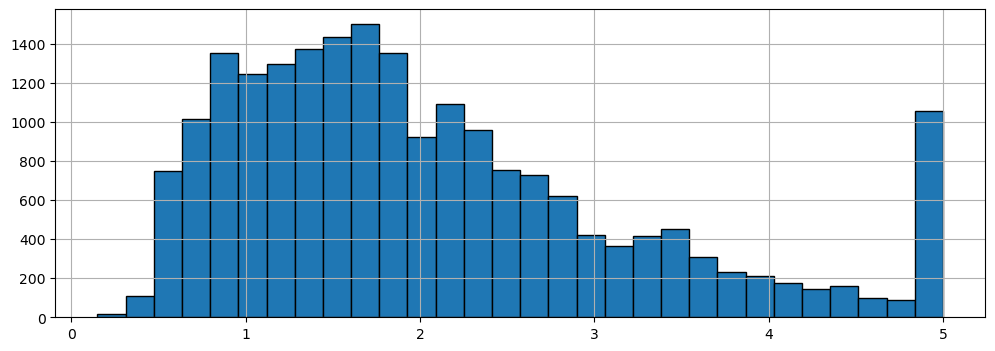

In [ ]:
med.hist(figsize=(12, 4), bins=30, edgecolor="black")

Распределение имеет относительно нормальное но имеет выброс в районе 5.

<Axes: >

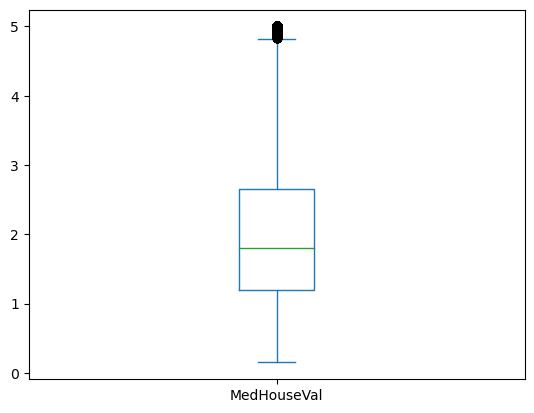

In [ ]:
display(med.plot.box())

In [ ]:
data_corr = data.copy(deep=True)
data_corr['MedHouseValue'] = med

<Axes: >

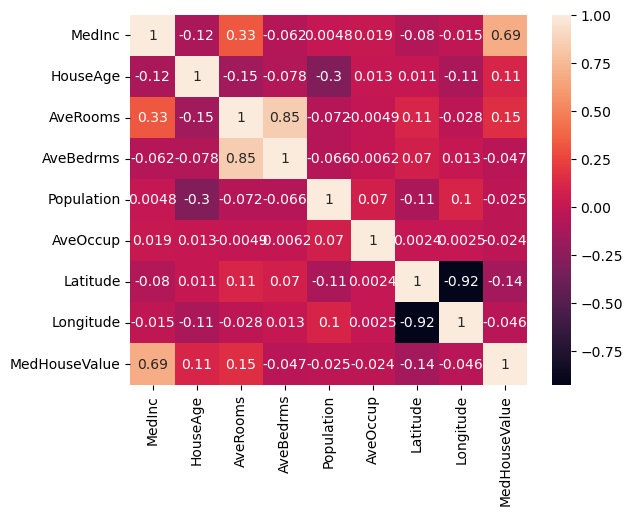

In [ ]:
sns.heatmap(data_corr.corr(), annot = True)

Здесь корреляция между AveRooms->AveBedrms и Latitude->Longitude, поэтому лучше оставить одну из пары. Наибольшая корреляция между целью и 'MedInc', 'HouseAge', 'AveRooms', 'Latitude'. их и оставим.

In [ ]:
X_train1 = X_train[['MedInc', 'HouseAge', 'AveRooms', 'Latitude']]
X_test1  = X_test[['MedInc', 'HouseAge', 'AveRooms', 'Latitude']]

In [ ]:
model1 = LinearRegression()

In [ ]:
model1.fit(X_train1, y_train)
pred1 = model1.predict(X_train1)
pred_test1 = model1.predict(X_test1)

In [ ]:
mean_squared_error(y_train, pred1, squared = False)

0.7989089953528047

In [ ]:
mean_squared_error(y_test, pred_test1, squared = False)

0.8059451277212133

In [ ]:
r2_score(y_train, pred1)

0.5225419016956813

In [ ]:
r2_score(y_test, pred_test1)

0.5043169272470043

Стало немного хуже. Посмотрим что с выбросами, может после них улучшится.

In [ ]:
data_corr = data_corr[['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'MedHouseValue']]

In [ ]:
Q1 = data_corr.quantile(0.25)
Q3 = data_corr.quantile(0.75)

IQR = Q3 - Q1

In [ ]:
out_low = Q1 - 1.5*IQR
out_upp = Q3 + 1.5*IQR

MedInc
0         8.3252
1         8.3014
131      11.6017
134       8.2049
135       8.4010
          ...   
20426    10.0472
20427     8.6499
20428     8.7288
20436    12.5420
20503     8.2787
Name: MedInc, Length: 681, dtype: float64


<Axes: >


HouseAge
No outliers

AveRooms
73       1.714286
155      8.972868
511      8.928358
512      9.210227
514      9.122715
           ...   
20408    8.730038
20426    9.890756
20428    8.715842
20436    9.873315
20462    8.652174
Name: AveRooms, Length: 511, dtype: float64


<Axes: >


Latitude
No outliers

MedHouseValue
89       5.00001
140      4.83300
459      5.00001
489      4.89600
493      5.00001
          ...   
20422    5.00001
20426    5.00001
20427    5.00001
20436    5.00001
20443    5.00001
Name: MedHouseValue, Length: 1071, dtype: float64


<Axes: >

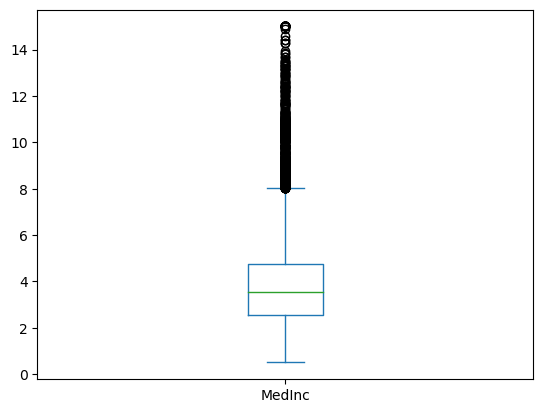

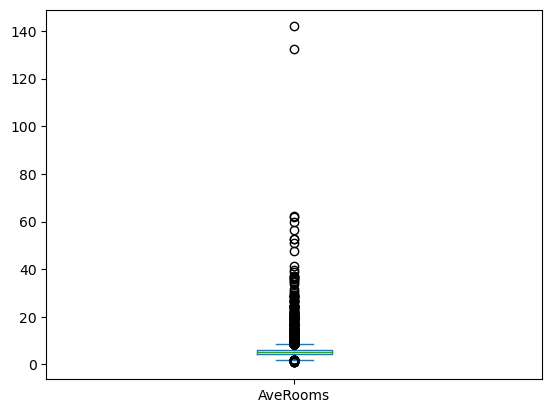

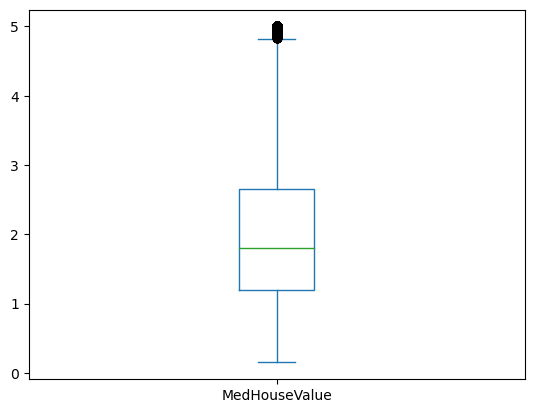

In [ ]:
for col in data_corr:
    val = data_corr[col]
    print(col)
    out = val[(val < out_low[col]) | (val > out_upp[col])]
    if len(out) == 0:
        print('No outliers')
    else:
        print(out)
        display(data_corr[[col]].plot.box())
    print()

In [ ]:
data_corr.shape

(20640, 5)

Удалим выбросы.

In [ ]:
data_clean = data_corr[~((data_corr < (out_low)) | (data_corr > (out_upp))).any(axis=1)]
data_clean.shape

(18974, 5)

Обучим ещё раз.

In [ ]:
target = data_clean['MedHouseValue']

In [ ]:
initial = data_clean[['MedInc', 'HouseAge', 'AveRooms', 'Latitude']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(initial, target, test_size=0.2, random_state=42)

In [ ]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
pred2 = model2.predict(X_train)
pred_test2 = model2.predict(X_test)

In [ ]:
mean_squared_error(y_train, pred2, squared = False)

0.6739406785304541

In [ ]:
mean_squared_error(y_test, pred_test2, squared = False)

0.6743600186306443

Лучше, чем в предыдущие два раза.

In [ ]:
r2_score(y_train, pred2)

0.4796299170391678

In [ ]:
r2_score(y_test, pred_test2)

0.4738483965815544

А здесь хуже, что-то пошло не так. В задании было сказано\
"a. Удалите выбросы в случае обнаружения."\
Видимо нужно было не удалять а действовать другим методом.